# EcoFOCIpy ADCP QC - 19CKP-12A

- mostly remove >100 cm/s flows in u/v


In [1]:
import xarray as xa
import numpy as np

import matplotlib.pyplot as plt

In [2]:
adcp_file='19ckp12a_0047m.nc'

In [3]:
xdf = xa.load_dataset(adcp_file)

In [4]:
xdf =xdf.where(xdf.u_curr_comp <=100,np.nan)
xdf

<xarray.Dataset>
Dimensions:          (latitude: 1, longitude: 1, time: 19054, depth: 24)
Coordinates:
  * time             (time) datetime64[ns] 2019-08-11T02:30:00 ... 2020-09-11...
  * depth            (depth) float64 -2.0 -0.0 2.0 4.0 ... 38.0 40.0 42.0 44.0
  * latitude         (latitude) float64 67.91
  * longitude        (longitude) float64 -168.2
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 5.182 ... -7.445
    v_curr_comp      (latitude, longitude, time, depth) float64 -1.221 ... 7.49
    w_curr_comp      (latitude, longitude, time, depth) float64 0.8 0.4 ... 0.1
    w_curr_comp_err  (latitude, longitude, time, depth) float64 9.9 8.6 ... -0.2
    agc1             (latitude, longitude, time, depth) float64 92.0 ... 129.0
    agc2             (latitude, longitude, time, depth) float64 92.0 ... 125.0
    agc3             (latitude, longitude, time, depth) float64 88.0 ... 130.0
    agc4             (latitude, longitude, time, depth) float64 96.0 ... 130.0
Attributes: (12/13)
    Latitude_DegMMddW:                      67 54.712 N
    Longitude_DegMMddN:                     168 11.628 W
    MooringID:                              19CKP-12A
    platform_deployment_date:               2019-08-11T02:14:47Z
    platform_deployment_cruise_name:        OS19-01
    platform_recovery_date:                 2020-09-11T01:00:00Z
    ...                                     ...
    platform_deployment_recovery_comments:  swapped CK4A ADCP here B/C it dro...
    WaterDepth:                             60.0
    date_created:                           2022-06-10T10:25:01Z
    date_modified:                          
    QC_indicator:                           unknown
    history:                                Trimmed to deployment.

In [5]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

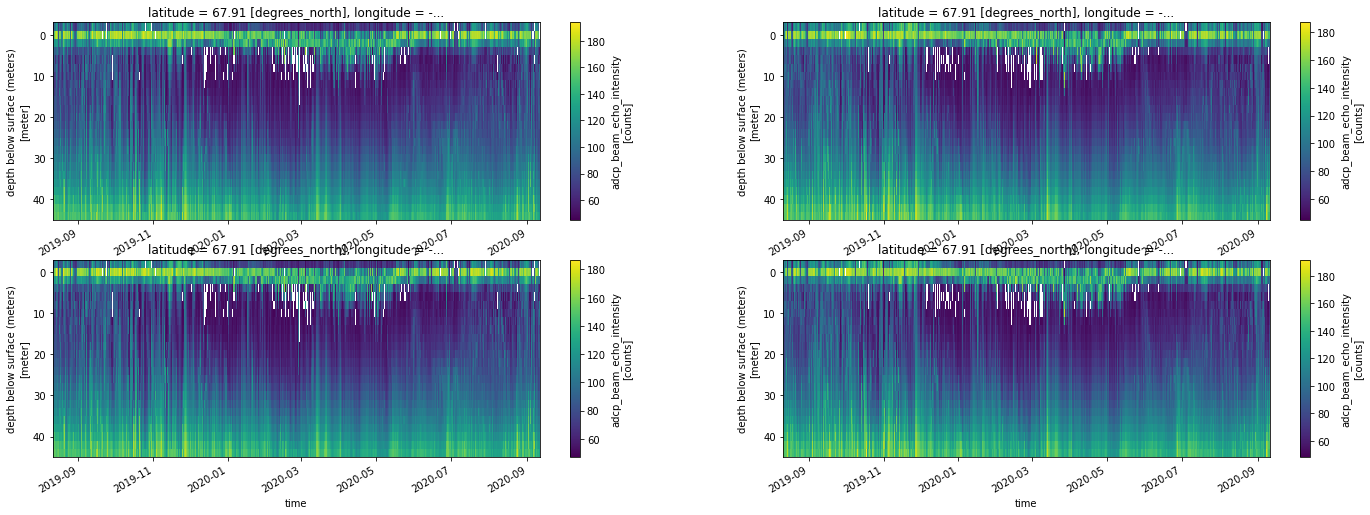

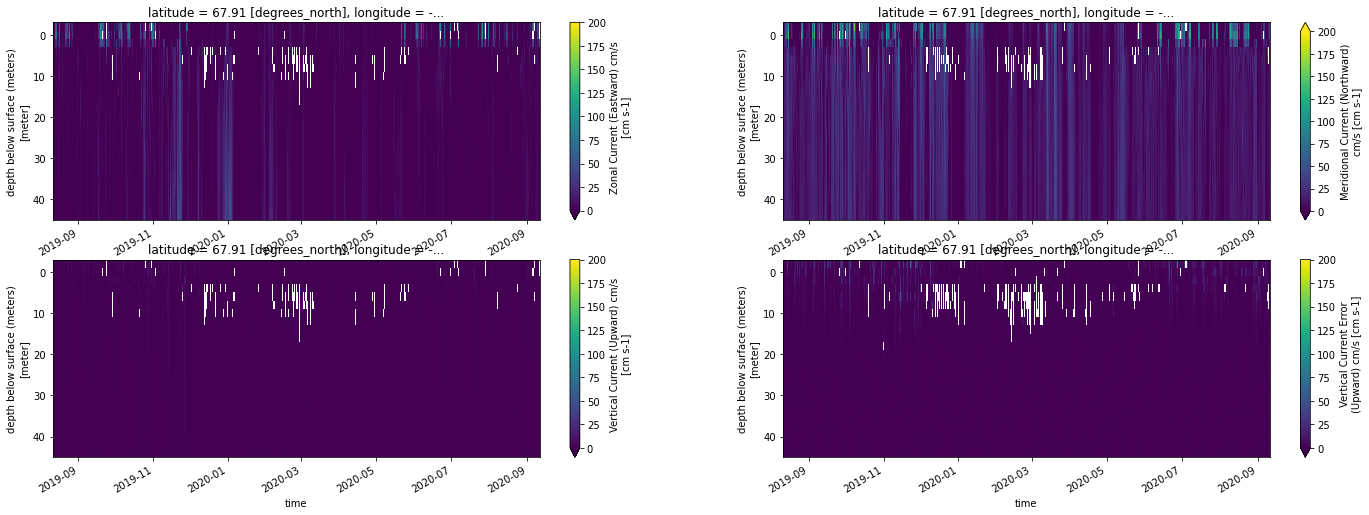

In [6]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [7]:
xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >100cm/s'

## Trim above surface (negative values)

In [8]:
ixdf = xdf.where(xdf.depth >=-0.).dropna(how='all',dim='depth')

In [9]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  trimmed above surface'

In [10]:
ixdf.to_netcdf(adcp_file.replace('.nc','.trimmed.nc'))

In [11]:
xdf = xa.load_dataset(adcp_file.replace('.nc','.trimmed.nc'))

In [12]:
ixdf = xdf.interpolate_na(dim='time',max_gap='2H')

In [13]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 1hour gaps'

## Interpolate over singleton missing gaps linearly

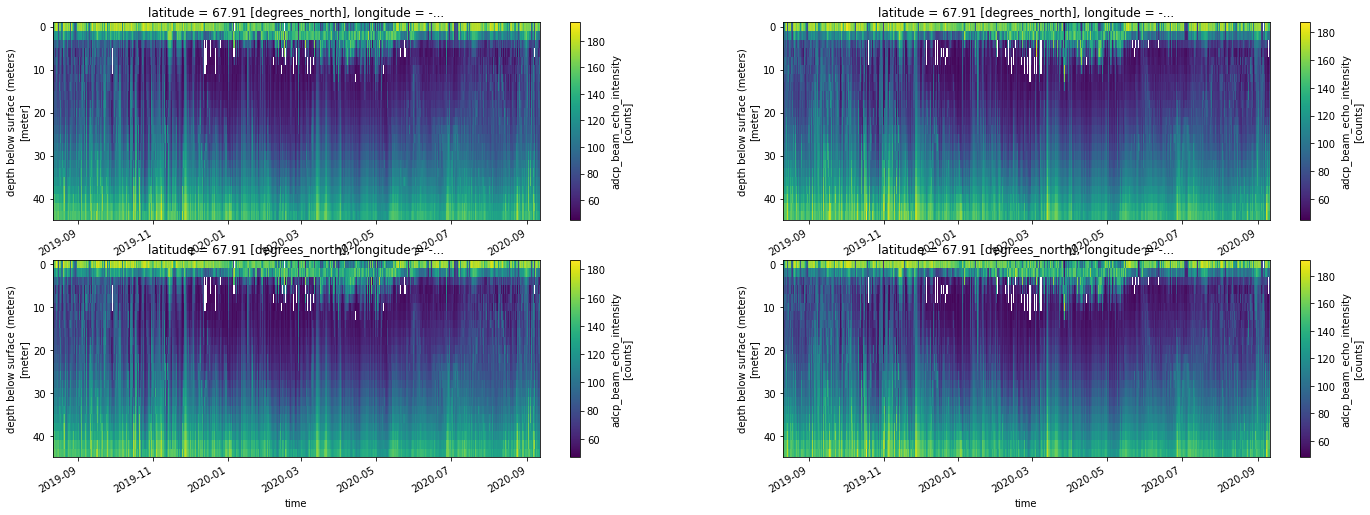

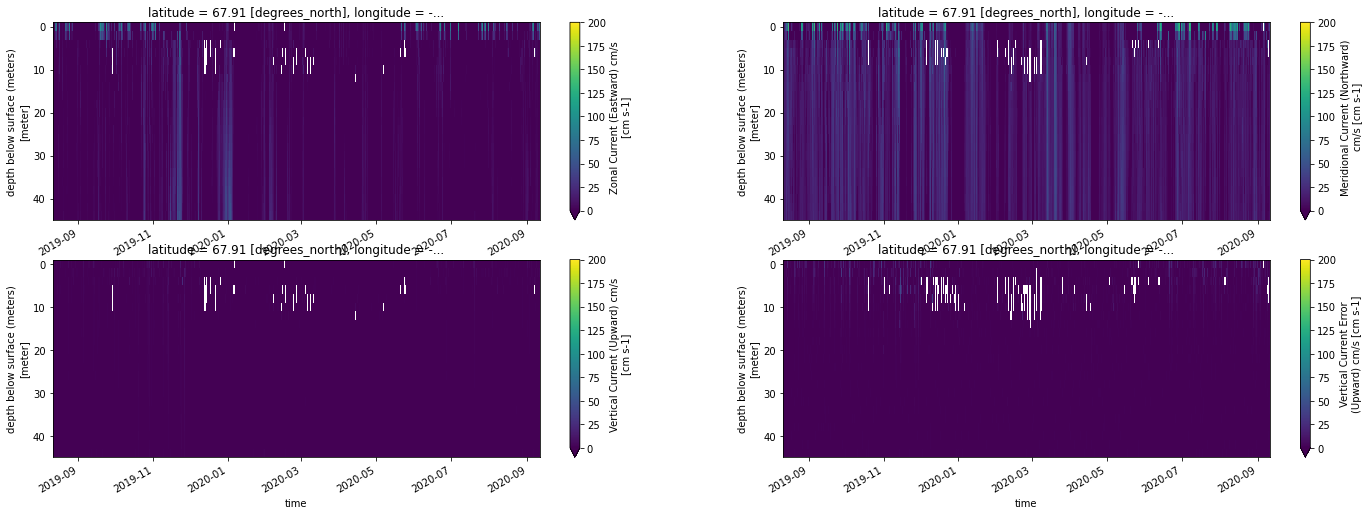

In [14]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [15]:
ixdf.to_netcdf(adcp_file.replace('.nc','.filtered.nc'))